In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread("BSE_Google.jpg",cv2.IMREAD_GRAYSCALE)
h,w = img.shape

In [69]:
def cal_mean(arr):
    return sum(arr)/len(arr)
def cal_std(arr,me):
    return np.sqrt(np.sum((arr-me)**2)/(len(arr)-1))
def cal_var(arr,me):
    return np.sum((arr-me)**2)/(len(arr)-1)

In [70]:
cal_std(a,cal_mean(a)), cal_var(a,cal_mean(a))

(1.5811388300841898, 2.5)

In [87]:
#Gaussian
def gaussian(arr):
    mean = cal_mean(arr)
    std = cal_std(arr,mean)
    noise = (1/(std*np.sqrt(2*np.pi))) * np.exp(-((arr-mean)**2)/(2*cal_var(arr,mean)))
    return noise

In [88]:
b = np.random.randn(3,3)
gaussian(b)

array([[0.47558659, 0.51935121, 0.09631982],
       [0.50023154, 0.40214594, 0.51988819],
       [0.1746801 , 0.15741619, 0.46653436]])

In [108]:
def add_gaussian(img):
    mu = cal_mean(img)
    sigma = cal_std(img,mu)
    noise = np.random.normal(mu,sigma,(img.shape)).astype('float64')
    noise_added = img.astype('float64') + noise
    noise_img = noise_added.astype('uint8')
    noise_img = np.clip(noise_img,0,255)
    return noise_img

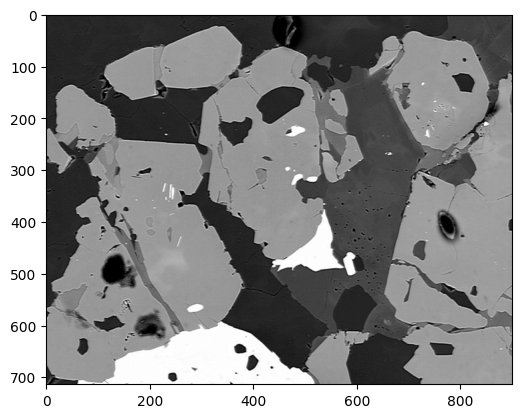

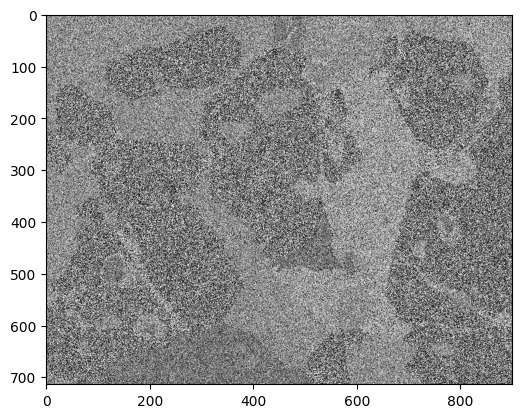

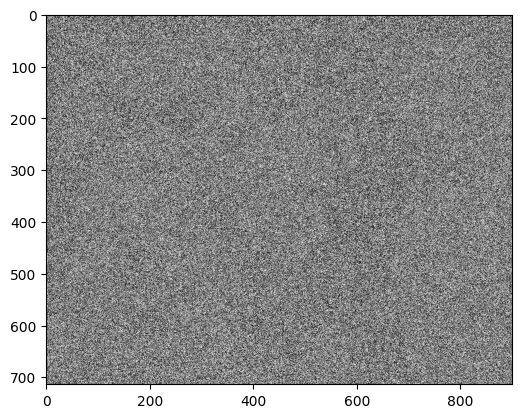

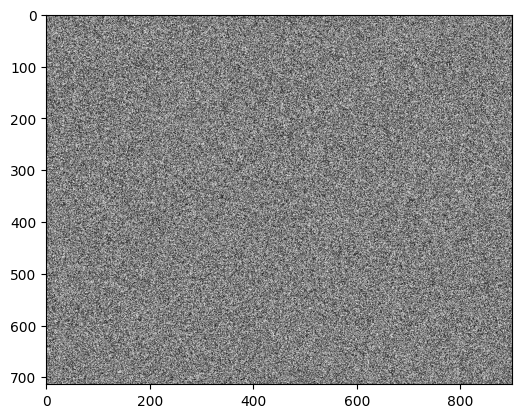

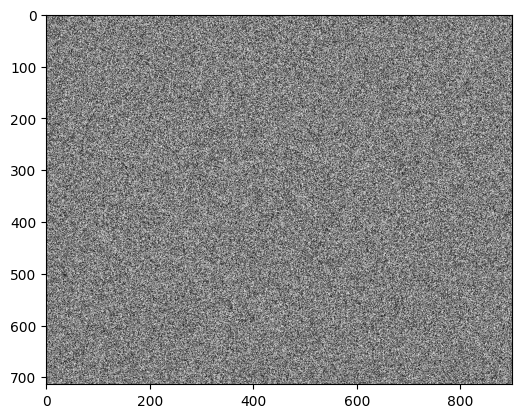

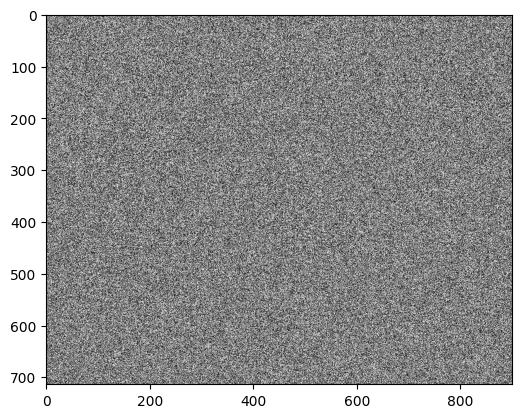

In [114]:
img = cv2.imread("BSE_Google.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()
for i in range(5):
    img = add_gaussian(img)
    plt.imshow(img,cmap='gray')
    plt.show()

In [169]:
np.random.seed(42)

In [200]:
# Forward diffusion
def forward_diffusion(img,timesteps = 5, beta_start=0.1,beta_end=0.5):
    mean,var = [],[]
    noises = []
    betas = np.linspace(beta_start,beta_end,timesteps)
    for t,beta in enumerate(betas):
        mean.append(cal_mean(img))
        var.append(cal_var(img,cal_mean(img)))
        noise = np.random.normal(0,1,img.shape)
        noises.append(noise)
        img = (np.sqrt(1-beta) * img) + (np.sqrt(beta)*noise)
        if t%10 == 0:
            plt.imshow(img,cmap='gray')
            plt.title(f't={t}')
            plt.show()
    return mean,var,img,noises

In [209]:
def rever_diffusion(noise_img,noise,timsteps=5):
    count = timsteps-1
    for i in range(timsteps):
        noise_img = noise_img - noise[count]
        if count%5 == 0:
            plt.imshow(noise_img,cmap='gray')
            plt.title(f't={count}')
            plt.show()
        count-=1

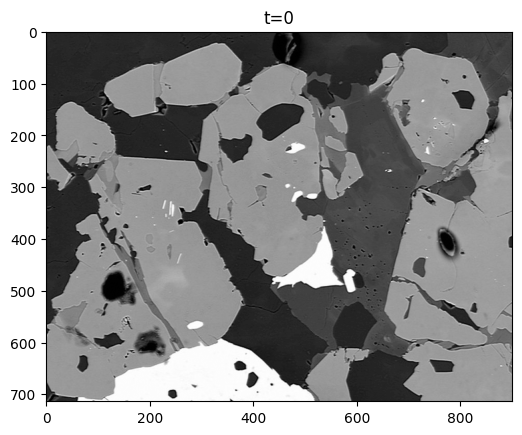

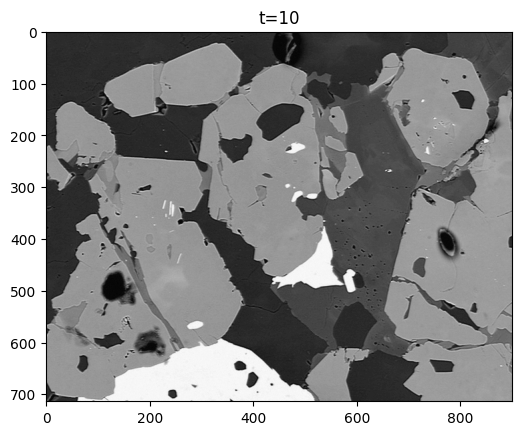

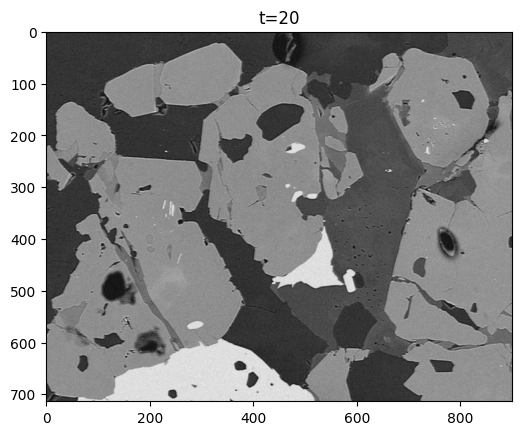

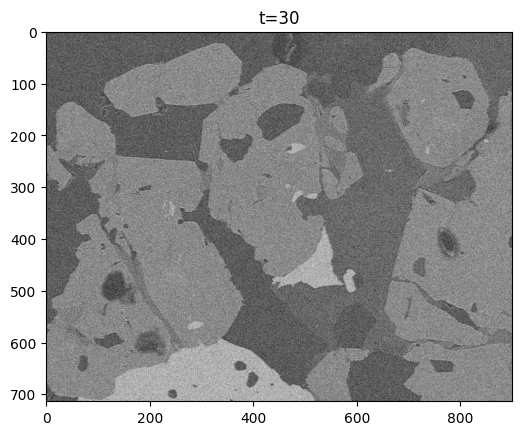

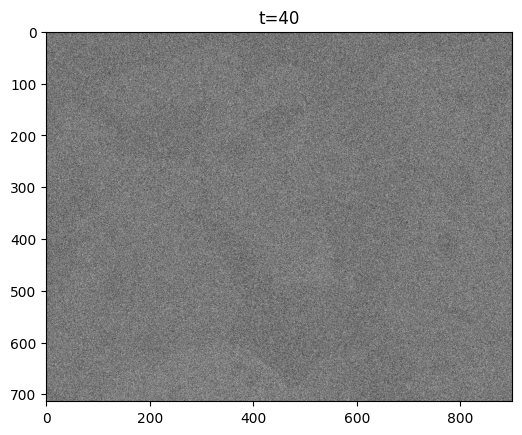

In [202]:
img = cv2.imread("BSE_Google.jpg",cv2.IMREAD_GRAYSCALE)
mean,var,noise_img,noises = forward_diffusion(img,50)

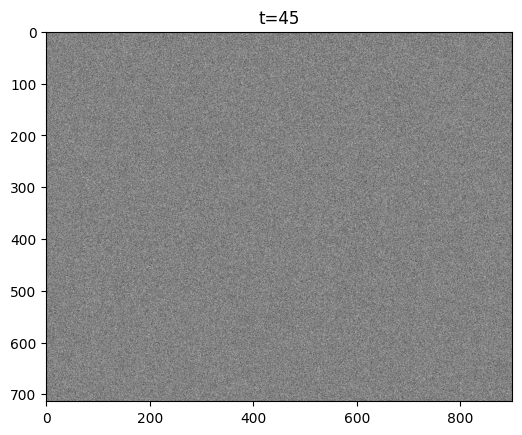

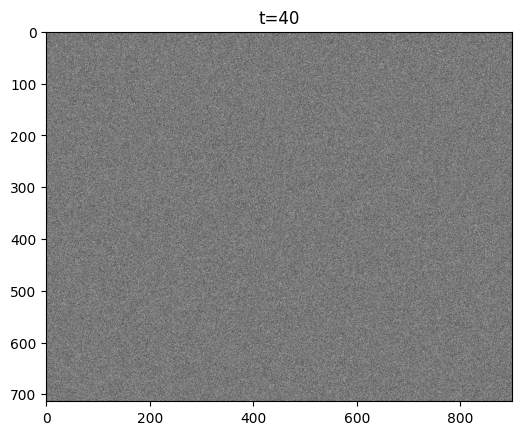

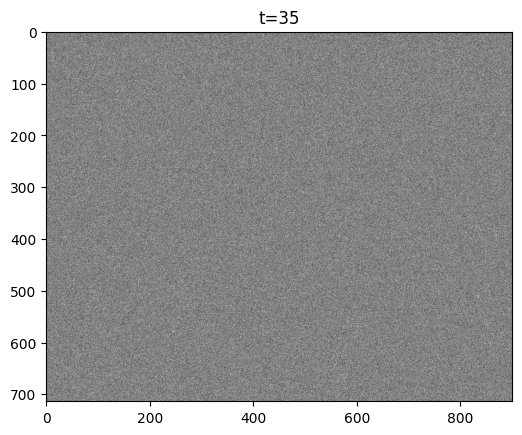

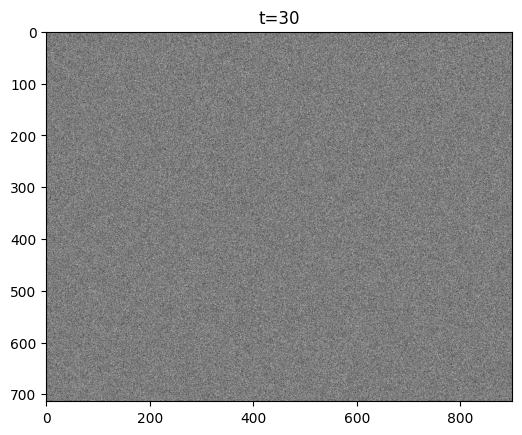

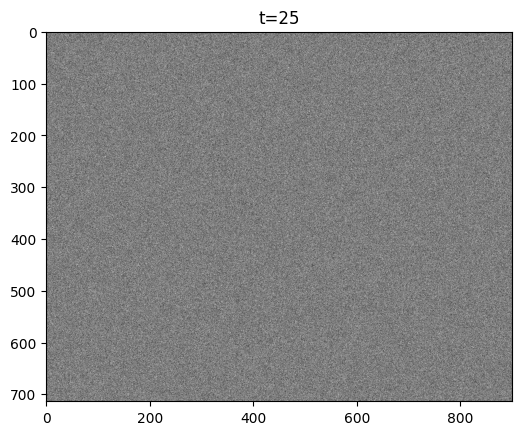

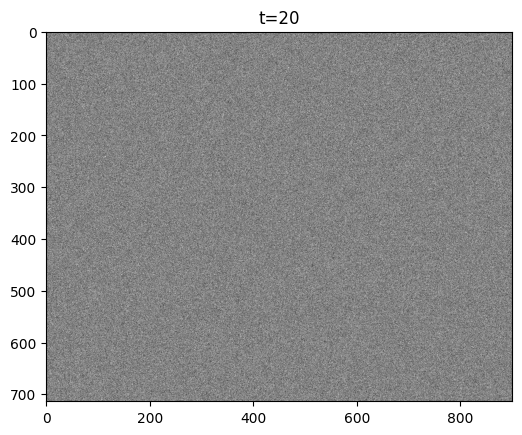

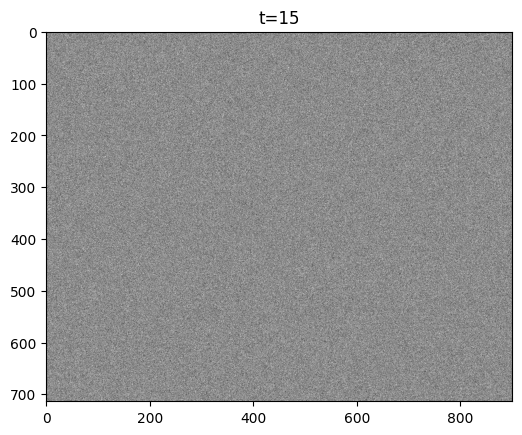

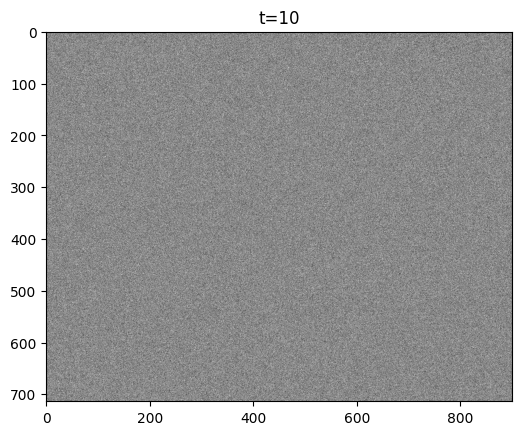

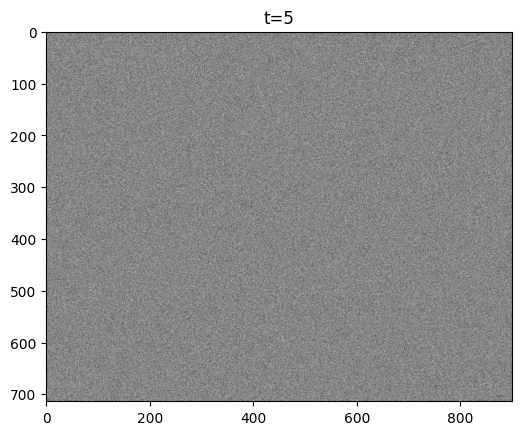

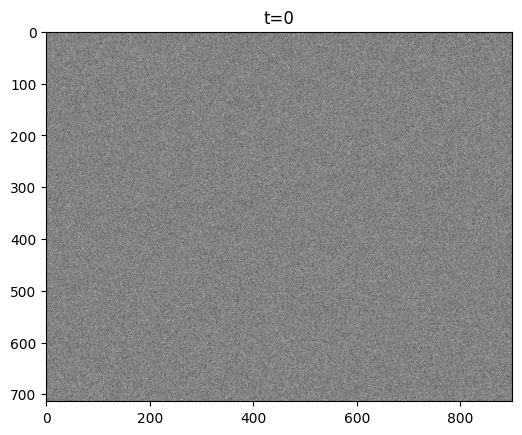

In [210]:
rever_diffusion(noise_img,noises,timsteps=50)

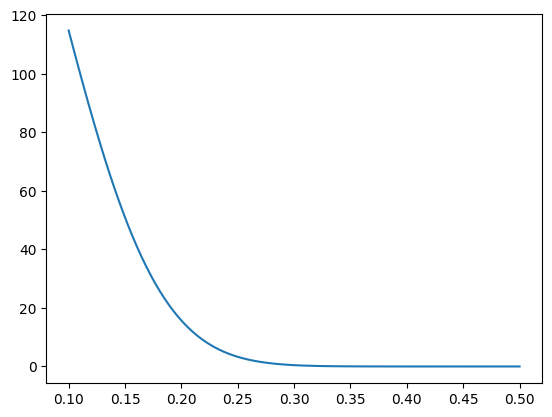

In [133]:
plt.plot(np.linspace(0.1,0.5,100),mean)

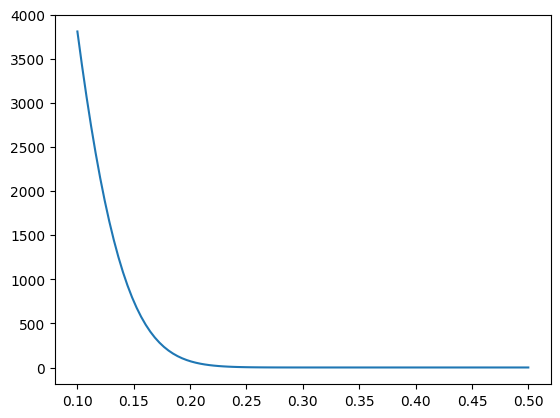

In [134]:
plt.plot(np.linspace(0.1,0.5,100),var)

In [143]:
noise = np.random.normal(0,np.sqrt(0.1),img.shape)
noise_img = np.sqrt(1-0.1)*img + noise

In [174]:
np.linspace(0.1,0.5,50)[::-1]

array([0.5       , 0.49183673, 0.48367347, 0.4755102 , 0.46734694,
       0.45918367, 0.45102041, 0.44285714, 0.43469388, 0.42653061,
       0.41836735, 0.41020408, 0.40204082, 0.39387755, 0.38571429,
       0.37755102, 0.36938776, 0.36122449, 0.35306122, 0.34489796,
       0.33673469, 0.32857143, 0.32040816, 0.3122449 , 0.30408163,
       0.29591837, 0.2877551 , 0.27959184, 0.27142857, 0.26326531,
       0.25510204, 0.24693878, 0.23877551, 0.23061224, 0.22244898,
       0.21428571, 0.20612245, 0.19795918, 0.18979592, 0.18163265,
       0.17346939, 0.16530612, 0.15714286, 0.14897959, 0.14081633,
       0.13265306, 0.1244898 , 0.11632653, 0.10816327, 0.1       ])

In [187]:
noises

array([], dtype=float64)